In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_path = Path("../Starter_Code/Resources/whale_returns.csv")
whale = pd.read_csv(whale_path, index_col = 'Date', infer_datetime_format=True, parse_dates=True)
whale.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale.isnull()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,True,True,True,True
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [4]:
# Drop nulls
whale = whale.dropna().copy()
whale

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_path = Path("../Starter_Code/Resources/algo_returns.csv")
algo = pd.read_csv(algo_path, index_col = 'Date', infer_datetime_format=True, parse_dates=True)
algo.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo.isnull()

,Algo 1,Algo 2
Date,,
2014-05-28,False,True
2014-05-29,False,True
2014-05-30,False,True
2014-06-02,False,True
2014-06-03,False,True
...,...,...
2019-04-25,False,False
2019-04-26,False,False
2019-04-29,False,False


In [7]:
# Drop nulls
algo = algo.dropna().copy()
algo

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices
sp500_path = Path("../Starter_Code/Resources/sp500_history.csv")
sp500 = pd.read_csv(sp500_path, index_col = 'Date', infer_datetime_format=True, parse_dates=True)
sp500.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [10]:
# Check Data Types
sp500.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types (Replaced the dollar sign with nothing, changed datatype to a float so we can use pct_chg on it later)
sp500["Close"] = sp500["Close"].str.replace("$", "")
sp500["Close"] = sp500["Close"].astype("float")
sp500["Close"]

/var/folders/d3/qmx2w0qs2bn3l1hmpff3qxym0000gn/T/ipykernel_50177/3524259244.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500["Close"] = sp500["Close"].str.replace("$", "")


Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
               ...   
2012-10-05    1460.93
2012-10-04    1461.40
2012-10-03    1450.99
2012-10-02    1445.75
2012-10-01    1444.49
Name: Close, Length: 1649, dtype: float64

In [12]:
# Calculate Daily Returns
sp500_daily_return = sp500.pct_change()
sp500_daily_return

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [13]:
# Drop nulls
sp500_daily_return = sp500_daily_return.dropna().copy()
sp500_daily_return

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [15]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_return.columns = ["SP500 Close"]

sp500_daily_return

,SP500 Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


## Combine Whale, Algorithmic, and S&P 500 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined = pd.concat([whale, algo, sp500_daily_return], axis="columns", join="inner")
combined.sort_index(inplace=True)
combined.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

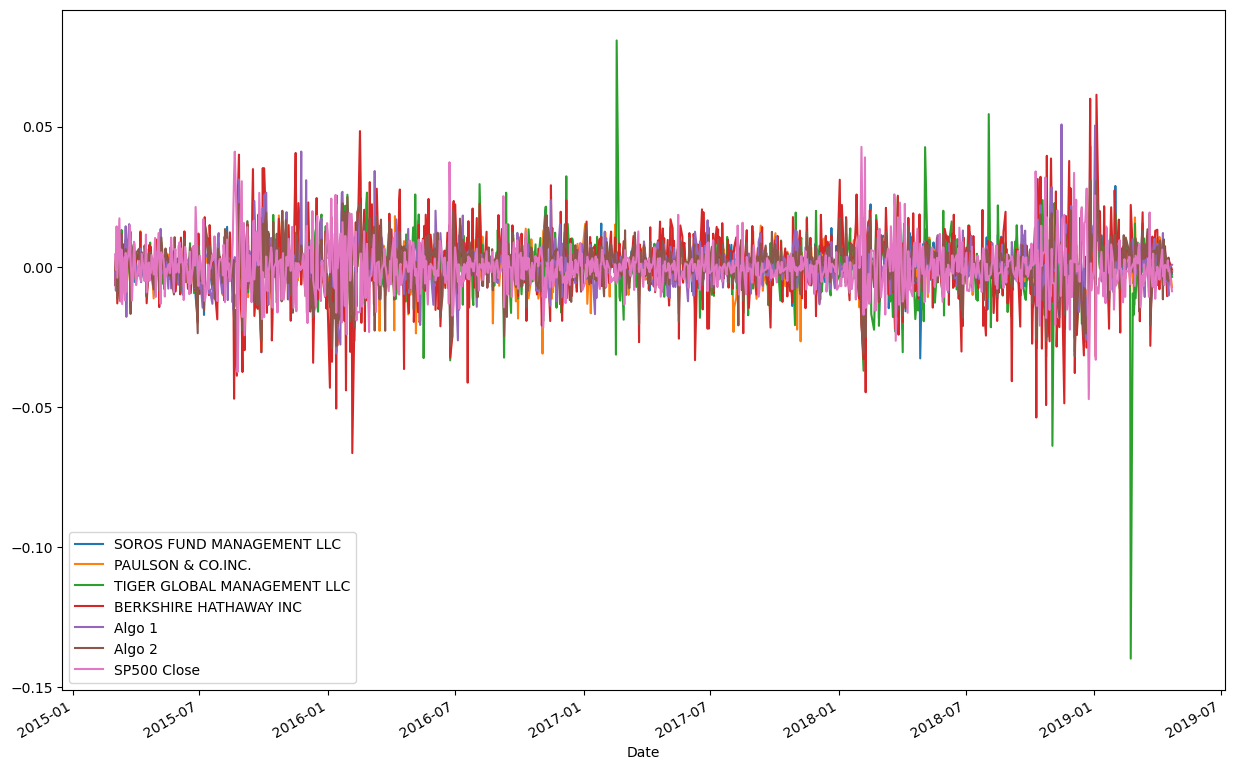

In [27]:
# Plot daily returns of all portfolios
all_returns = combined
all_returns.plot(figsize=(15,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

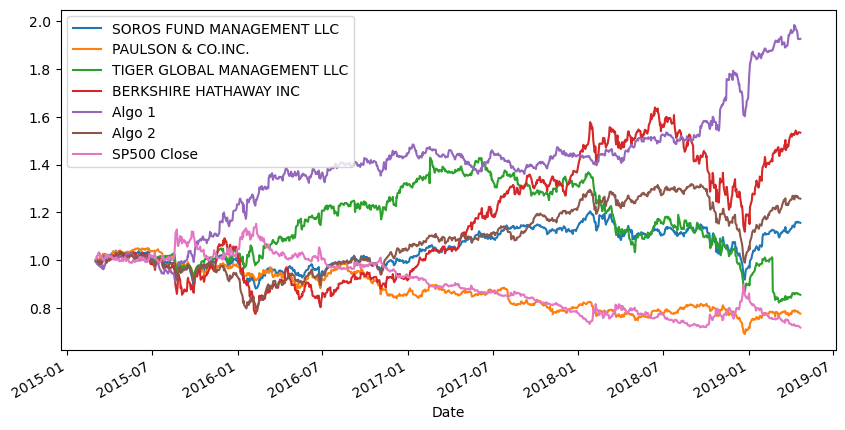

In [29]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_returns).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(10,5))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

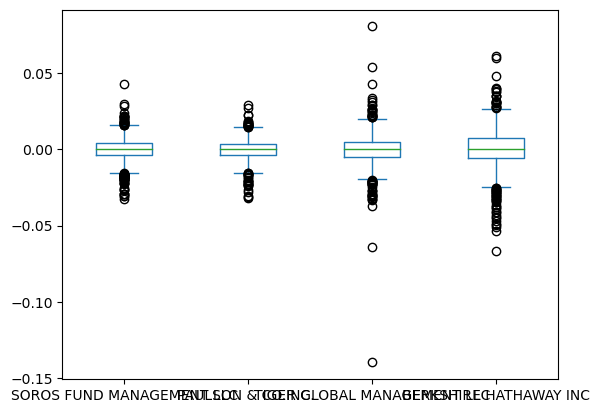

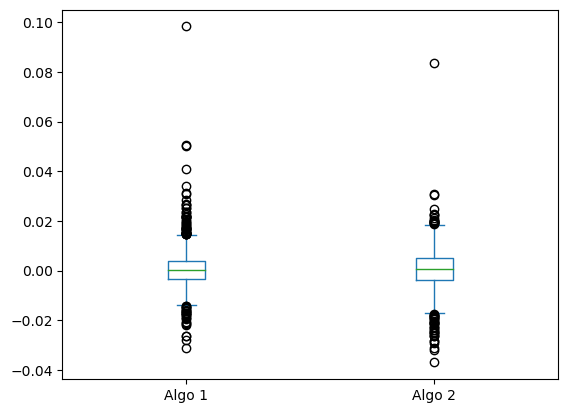

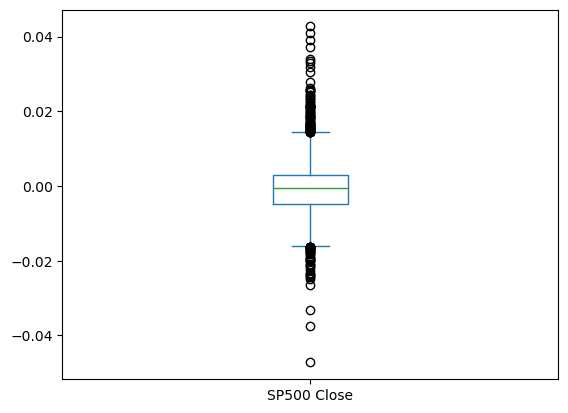

In [84]:
# Box plot to visually show risk
whale.plot.box()
algo.plot.box()
sp500_daily_return.plot.box()

### Calculate Standard Deviations

In [30]:
# Calculate the daily standard deviations of all portfolios
daily_std = all_returns.std()
daily_std = daily_std.sort_values(ascending = False)
daily_std.head()

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
SP500 Close                    0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [31]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = sp500.std()
sp500_std.head()


Close    402.122004
dtype: float64

In [97]:
# Determine which portfolios are riskier than the S&P 500
all_returns_std = all_returns.std()
all_std = all_returns_std.sort_values(ascending=False)
all_std

Algo 2                         682.512378
Algo 1                          15.717003
SOROS FUND MANAGEMENT LLC             NaN
PAULSON & CO.INC.                     NaN
TIGER GLOBAL MANAGEMENT LLC           NaN
BERKSHIRE HATHAWAY INC                NaN
SP500 Close                           NaN
dtype: float64

### Calculate the Annualized Standard Deviation

In [55]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = daily_std * np.sqrt(252)
annual_std.head()

Algo 2                       10829.346406
Algo 1                         249.404199
Close                            0.135830
SOROS FUND MANAGEMENT LLC             NaN
PAULSON & CO.INC.                     NaN
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

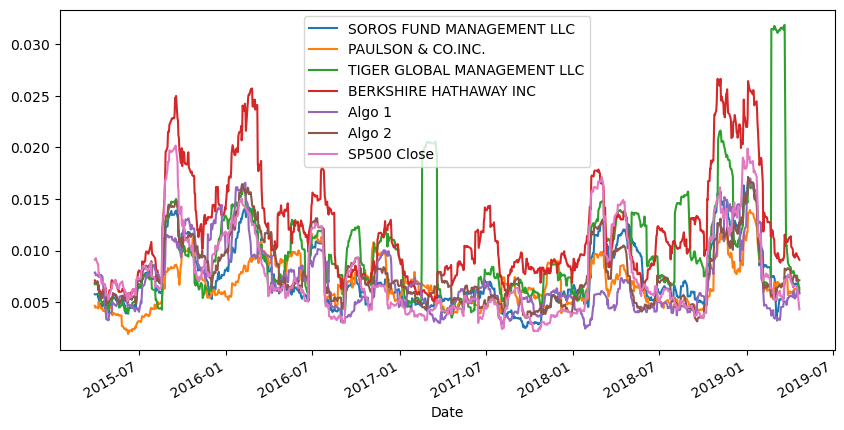

In [32]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation

all_returns.rolling(window = 21).std().plot(figsize=(10,5))

### Calculate and plot the correlation

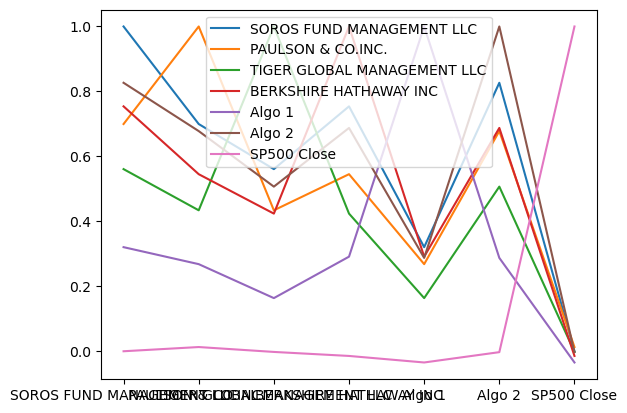

In [33]:
# Calculate the correlation
# Display de correlation matrix

correlation = all_returns.corr().plot()

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

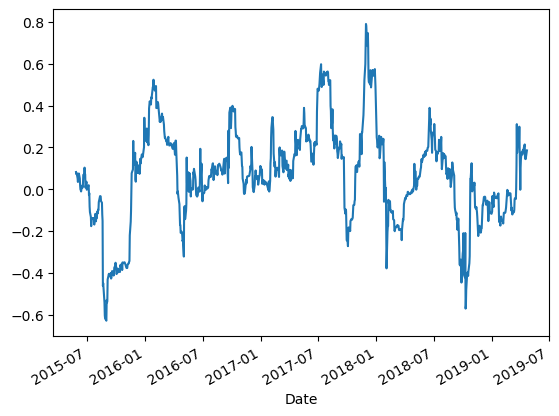

In [46]:
# Calculate covariance of a single portfolio 
whale_covariance = all_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(all_returns['SP500 Close'])
whale_covariance

# Calculate variance of S&P 500
variance = all_returns['SP500 Close'].rolling(window=60).var()
variance

# Computing beta
com_beta = whale_covariance/variance


# Plot beta trend
com_beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

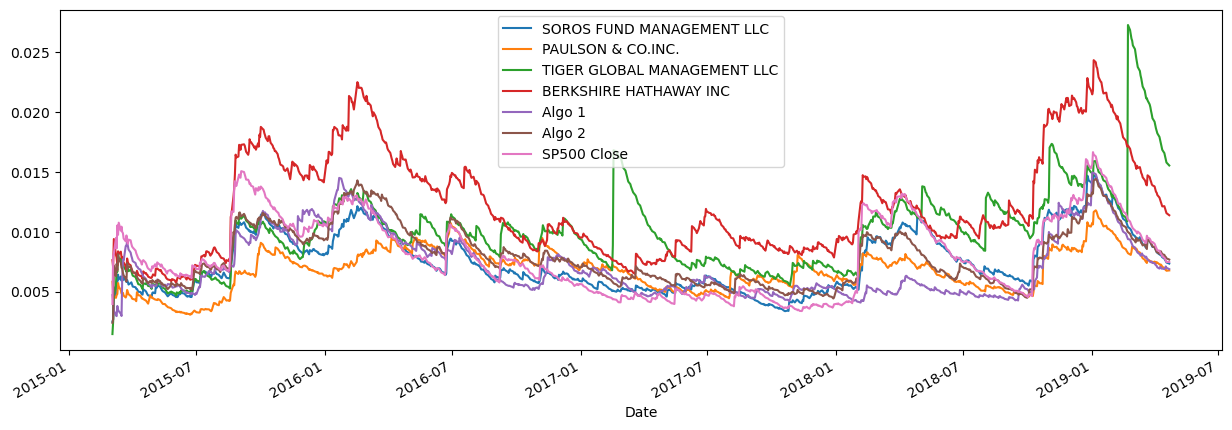

In [52]:
# Use `ewm` to calculate the rolling window
rolling_whale_covariance = all_returns.ewm(halflife=21).std()
rolling_whale_covariance.plot(figsize= (15,5))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [54]:
# Annualized Sharpe Ratios
sharpe_ratio = combined.mean()*252 / combined.std()*np.sqrt(252)
sharpe_ratio


SOROS FUND MANAGEMENT LLC       86.409176
PAULSON & CO.INC.             -123.838434
TIGER GLOBAL MANAGEMENT LLC    -32.806958
BERKSHIRE HATHAWAY INC         152.899121
Algo 1                         345.136425
Algo 2                         122.052242
SP500 Close                   -130.682708
dtype: float64

<AxesSubplot:>

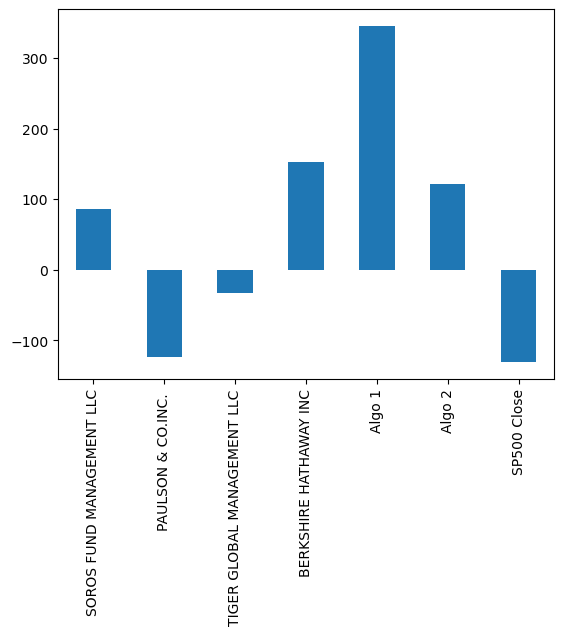

In [55]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [65]:
# Reading data from 1st stock
aapl_path = Path("../Starter_Code/Resources/aapl_historical.csv")
aapl = pd.read_csv(aapl_path, index_col= 'Trade DATE',infer_datetime_format= True, parse_dates=True)
aapl.sort_index(inplace= True)
aapl = aapl.drop(columns=['Symbol'])
aapl.head()

,NOCP
Trade DATE,
2018-05-11,188.59
2018-05-14,188.15
2018-05-15,186.44
2018-05-16,188.18
2018-05-17,186.99


In [66]:
# Reading data from 2nd stock
goog_path = Path("../Starter_Code/Resources/goog_historical.csv")
goog = pd.read_csv(goog_path, index_col= 'Trade DATE',infer_datetime_format= True, parse_dates=True)
goog.sort_index(inplace= True)
goog = goog.drop(columns=['Symbol'])
goog.head()

,NOCP
Trade DATE,
2018-05-11,1098.26
2018-05-14,1100.20
2018-05-15,1079.23
2018-05-16,1081.77
2018-05-17,1078.59


In [58]:
# Reading data from 3rd stock
cost_path = Path("../Starter_Code/Resources/cost_historical.csv")
cost = pd.read_csv(cost_path, index_col= 'Trade DATE',infer_datetime_format= True, parse_dates=True)
cost.sort_index(inplace= True)
cost = cost.drop(columns=['Symbol'])
cost.head

,NOCP
Trade DATE,
2018-05-11,195.76
2018-05-14,195.88
2018-05-15,195.48
2018-05-16,198.71
2018-05-17,199.60


In [83]:
# Combine all stocks in a single DataFrame
combined = pd.concat([aapl, goog, cost], axis="columns", join="inner")
combined.sort_index(inplace=True)
combined.columns=['AAPL','COST','GOOG']
combined.head()

,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,1098.26,195.76
2018-05-14,188.15,1100.20,195.88
2018-05-15,186.44,1079.23,195.48
2018-05-16,188.18,1081.77,198.71
2018-05-17,186.99,1078.59,199.60


In [84]:
# Calculate daily returns
combined_daily_return = combined.pct_change()

# Drop NAs
combined_daily_return.dropna(inplace=True)
# Display sample data
combined_daily_return

,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.001766,0.000613
2018-05-15,-0.009088,-0.019060,-0.002042
2018-05-16,0.009333,0.002354,0.016523
2018-05-17,-0.006324,-0.002940,0.004479
2018-05-18,-0.003637,-0.011339,-0.003206
...,...,...,...
2019-05-03,0.012431,0.019602,0.007953
2019-05-06,-0.015443,0.003366,-0.001594
2019-05-07,-0.026957,-0.012855,-0.016583


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [85]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_return = combined_daily_return.dot(weights)
# Display sample data
portfolio_return

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
                ...   
2019-05-03    0.013329
2019-05-06   -0.004557
2019-05-07   -0.018798
2019-05-08   -0.000547
2019-05-09   -0.001751
Length: 249, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [86]:
# Join your returns DataFrame to the original returns DataFrame
combined_daily_return['Total Returns'] = portfolio_return
combined_daily_return

,AAPL,COST,GOOG,Total Returns
Trade DATE,,,,
2018-05-14,-0.002333,0.001766,0.000613,0.000015
2018-05-15,-0.009088,-0.019060,-0.002042,-0.010064
2018-05-16,0.009333,0.002354,0.016523,0.009403
2018-05-17,-0.006324,-0.002940,0.004479,-0.001595
2018-05-18,-0.003637,-0.011339,-0.003206,-0.006061
...,...,...,...,...
2019-05-03,0.012431,0.019602,0.007953,0.013329
2019-05-06,-0.015443,0.003366,-0.001594,-0.004557
2019-05-07,-0.026957,-0.012855,-0.016583,-0.018798


In [87]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_daily_return.dropna(inplace=True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [88]:
# Calculate the annualized `std`
annualized_std = combined_daily_return.std()*np.sqrt(252)
annualized_std['Total Returns']

0.2102620573198797

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Trade DATE'>

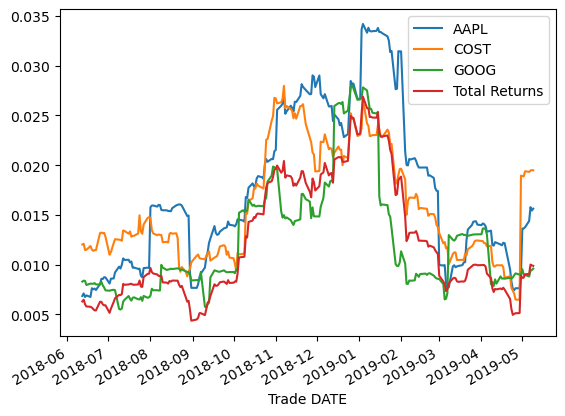

In [89]:
# Calculate rolling standard deviation
rolling_std_dev = combined_daily_return.rolling(window=21).std()
# Plot rolling standard deviation
rolling_std_dev.plot()

### Calculate and plot the correlation

In [92]:
# Calculate and plot the correlation
correlation = combined_daily_return.corr()
correlation

,AAPL,COST,GOOG,Total Returns
AAPL,1.000000,0.655007,0.413546,0.881676
COST,0.655007,1.000000,0.385145,0.853984
GOOG,0.413546,0.385145,1.000000,0.687446
Total Returns,0.881676,0.853984,0.687446,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:xlabel='Date'>

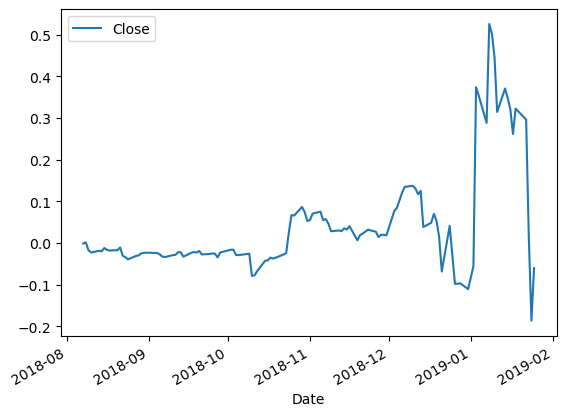

In [95]:
# Calculate and plot Beta
sp500_return = sp500.pct_change()
sp500_var = sp500_return.rolling(60).var()
cov = combined_daily_return['Total Returns'].rolling(60).cov(sp500_return)
new_beta = cov/sp500_var
new_beta.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [96]:
# Calculate Annualized Sharpe Ratios
annualized_sharpe = (combined_daily_return.mean() * 252) / (combined_daily_return.std() * np.sqrt(252))
annualized_sharpe

AAPL             0.361306
COST             0.349657
GOOG             1.160482
Total Returns    0.701280
dtype: float64

<AxesSubplot:>

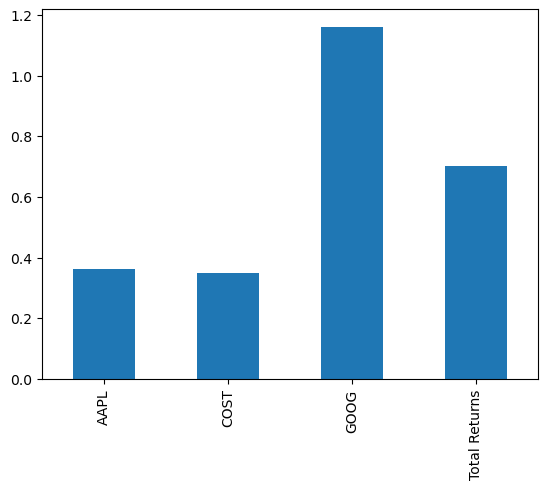

In [97]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe.plot(kind= 'bar')

### How does your portfolio do?

Write your answer here!